# Prosper Loan Data Exploration 
## by (Ludmila Mucavele)

## Introduction
  
This document explores the Prosper Loan dataset that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The last update of the dataset was in 03/11/2014.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

# high-level overview of data shape and composition
print(loan.shape)
print(loan.head())
print(loan.info())

(113937, 81)
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18

In [3]:
# look for duplicated loans
loan[loan.ListingNumber.duplicated()].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
# look for null values related to Prosper Payments variables
loan.TotalProsperLoans.isna().sum()

91852

In [5]:
# look for members with more than one loan
loan[loan.MemberKey.duplicated()].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
407,09AC35424172422634FEA19,569077,2012-03-15 20:09:59.610000000,NaN,60,Completed,2013-05-01 00:00:00,0.35838,0.3304,0.3204,...,-41.23,0.0,0.0,0.0,0.0,1.0,0,0,0.0,21
601,3C4B3563677551822A14501,681074,2012-12-03 10:13:15.167000000,NaN,36,Current,NaN,0.33286,0.2932,0.2832,...,-40.84,0.0,0.0,0.0,0.0,1.0,0,0,0.0,33
625,45C63365010280234D677C1,28942,2006-08-04 05:54:05.640000000,A,36,Completed,2009-08-14 00:00:00,0.12951,0.1225,0.1150,...,-55.59,0.0,0.0,0.0,0.0,1.0,0,0,0.0,121
878,3DD43559748748238E2E169,647225,2012-09-29 23:35:32.073000000,NaN,36,Completed,2013-03-29 00:00:00,0.31627,0.2770,0.2670,...,-10.82,0.0,0.0,0.0,0.0,1.0,0,0,0.0,17


In [6]:
# drop duplicated loans from dataset
loan = loan.drop_duplicates(['ListingNumber'])

In [7]:
# drop MonthlyLoanPayment values with null values
loan.drop(loan[loan.MonthlyLoanPayment == 0].index , axis = 0, inplace = True)
loan.shape

(112131, 81)

In [8]:
# rename variables
loan.rename(columns= {'ListingCategory (numeric)' : 'ListingCategory', 'ProsperRating (numeric)' : 'ProsperRating_numeric',
                     'ProsperRating (Alpha)': 'ProsperRating_alpha'}, inplace = True)


In [9]:
# rename one of the Loan Status value
def replace (x):
    if 'Past' in x:
        return 'PastDue'
    else:
        return x
    
loan['LoanStatus'] = loan['LoanStatus'].apply(lambda x: replace(x))

# change Loan Status data type
order = ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'PastDue']
status = pd.api.types.CategoricalDtype(ordered = True, categories = order)
loan['LoanStatus'] = loan['LoanStatus'].astype(status)

In [10]:
loan.LoanStatus.value_counts()

Current                   55730
Completed                 37261
Chargedoff                11992
Defaulted                  4887
PastDue                    2057
FinalPaymentInProgress      199
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
# transform object variables into category variables
values = ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired']
cat = pd.api.types.CategoricalDtype(ordered = False, categories = values)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(cat)

### What is the structure of your dataset?

The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan. Most of the variables are numeric, but there few boolean variables and some others that are ordered factor variables with levels, as follows:


* ProsperRating (numeric): 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.

* LoanStatus: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.

* EmploymentStatus: Employed, Full-time, Self-employed, Not available, Other, Part-time, Not employed, Retired.

* ListingCategory: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.


### What is/are the main feature(s) of interest in your dataset?

In this dataset, I'm most interested in figuring out what features are best for answering **if borrowers characteristics influence in the loan amount. And how do borrowers behave in terms of payment.**


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For the investigating the points above, I expect that the following features can help:

   *   EmploymentStatus: The employment status of the borrower at the time they posted the listing.
   *   ListingCategory: The category of the listing that the borrower selected when posting their listing. 
   *   StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created. 
   *   CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
   *   CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
   *   LoanOriginationDate: The date the loan was originated.
   *   LoanOriginalAmount: The origination amount of the loan.
   *   LoanStatus: The current status of the loan. 
   *   MonthlyLoanPayment: The scheduled monthly loan payment.
   *   TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.
   *   OnTimeProsperPayments: Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans. 
   *   ProsperPaymentsOneMonthPlusLate: Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.

These features directly related to the borrowers and can provide us the necessary information for the investigation.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables in the dataset.


I will start by looking at the distribution of the main variable of interest for this question: loan original amount.

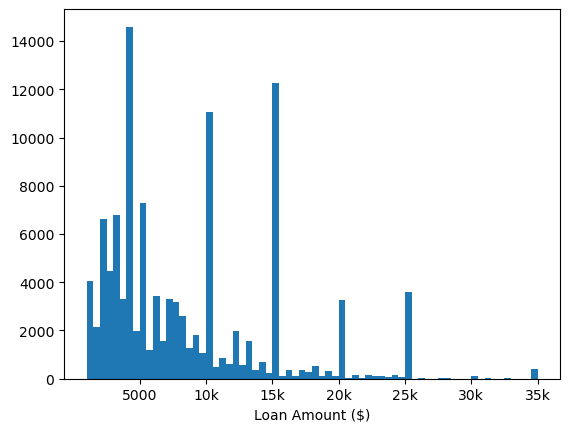

In [12]:
# Starting with a standard-scaled plot
binsize = 500
bins = np.arange(1000, 35000 + 0.1, binsize)
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], [5000, '10k', '15k', '20k', '25k', '30k', '35k'])
plt.xlabel('Loan Amount ($)');

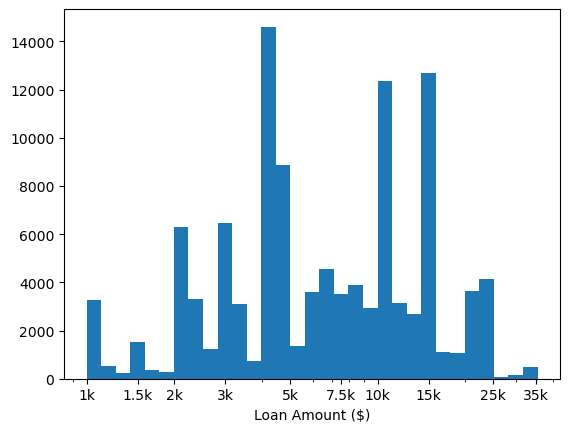

In [13]:
# There's a long tail in the distribution, so let's put it on a log scale instead
binsize = 0.05
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+binsize, binsize)


plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1000, 1500, 2000, 3000, 5000, 7500, 10000, 15000, 25000, 35000], 
           ['1k', '1.5k', '2k', '3k', '5k', '7.5k', '10k', '15k', '25k', '35k'])
plt.xlabel('Loan Amount ($)');

As it is shown above, the Loan Amount has a long-tailed distribution, which most of the loans are on low amount, and few of them, on the high price end.

When plotted on a log-scale, the amount distribution looks multimodal with many peaks. Some of them are between 3500 and 6000, 6000 and 12000, 12000 and 17500, and so on; other peaks are below 4000.

Next up, the first predictor variable of interest for this question: LoanStatus.

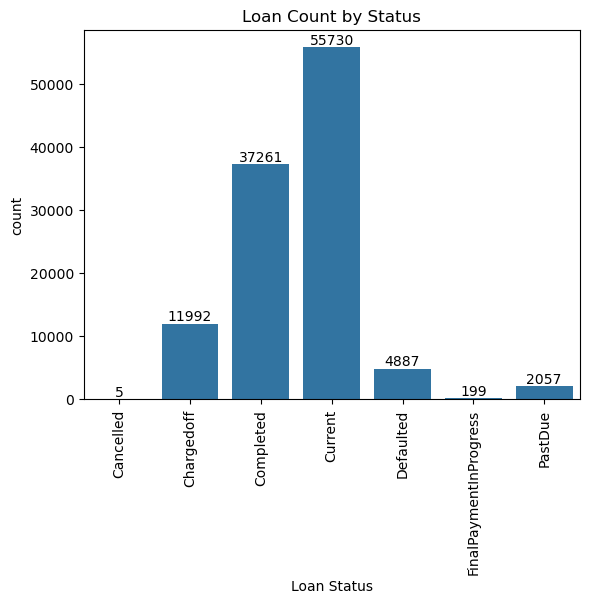

In [14]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanStatus', color = base_color)
plt.xlabel('Loan Status')
plt.xticks(rotation = 90)
plt.title ('Loan Count by Status')

for i in range (len(order)):
    text = sum(loan.LoanStatus == order[i])
    #plt.text(x, y, text, horizontalalignment, verticalalignment)
    plt.text(i, text + 2200, text, ha = 'center', va='top')

As it shown above, most of the loans were currently being paid in that season, but many of them were completed too. Interestingly, a good amount of loans have payment that has not been made by its cutoff time (Past Due), and very few loans are in their final payment progress, but only 5 are cancelled. 

That being said, let's now move for other two variables: EmploymentStatus, ListingCategory.

Text(0.5, 0, 'Listing Category')

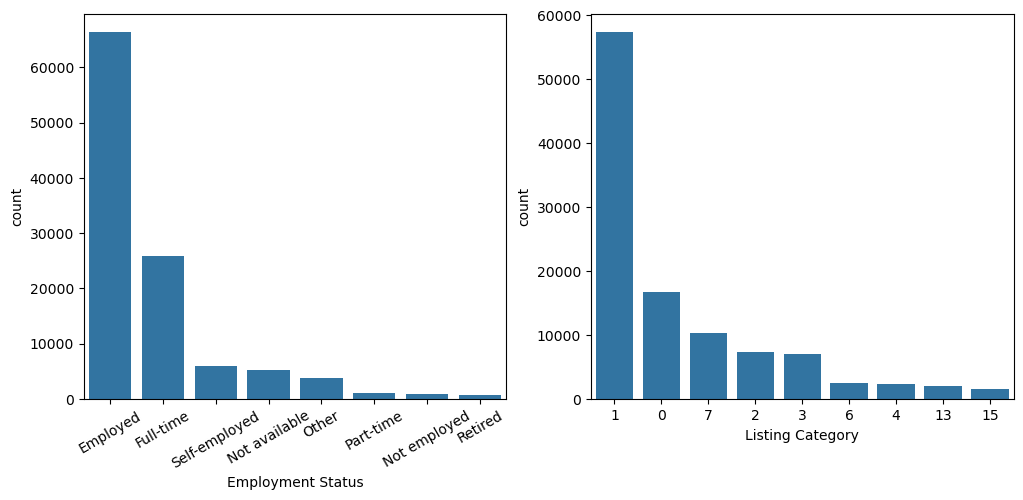

In [15]:
# plot the two together to get an idea of each nominal variable's distribution.

order = loan.EmploymentStatus.value_counts().index
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
plot = sb.countplot(data = loan, x = 'EmploymentStatus', order = order, color = base_color)
plot.set_xticklabels(order, rotation=30)
plt.xlabel('Employment Status')

category = loan.query('ListingCategory == [1, 0, 7, 2, 3, 6, 4, 13, 15]')
#category = loan.query('ListingCategory == 1 or ListingCategory == 0 or ListingCategory == 7 or ListingCategory == 2 or ListingCategory == 3 or ListingCategory == 6 or ListingCategory == 4 or ListingCategory == 13 or ListingCategory == 15')
order = category.ListingCategory.value_counts()
plt.subplot(1, 2, 2)
plot = sb.countplot(data = category, x = 'ListingCategory', order = order.index, color = base_color)
plt.xlabel('Listing Category')


Counting the employment status of the borrower along with the listing category of loan, it is noted that most of the borrowers are employed (more than 60,000), followed by full-time and self-employed borrowers. Most of the loans belong to the listing category 1 (Loan for Debt Consolidation) followed by the listing category 0 (Not Available) and 7 (Loan for Other reason) and other categories, what could mean that a great amount of loans for Debt Consolidation can belong to employed borrowers.

Let's now move for other to variable: MonthlyLoanPayment

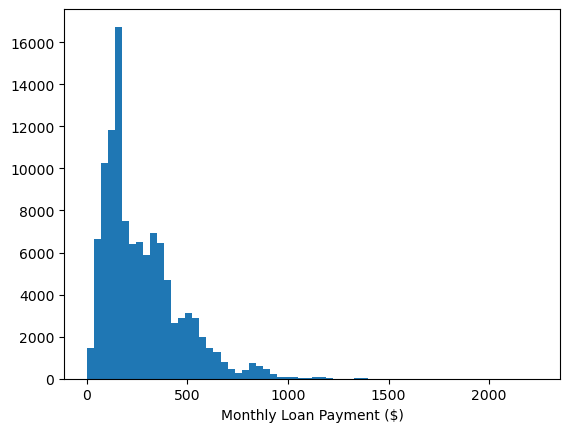

In [16]:
# plot the continuos variable distribution with a standard-scaled plot

bins = np.arange(0, loan.MonthlyLoanPayment.max() + 1, 35)
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment ($)');

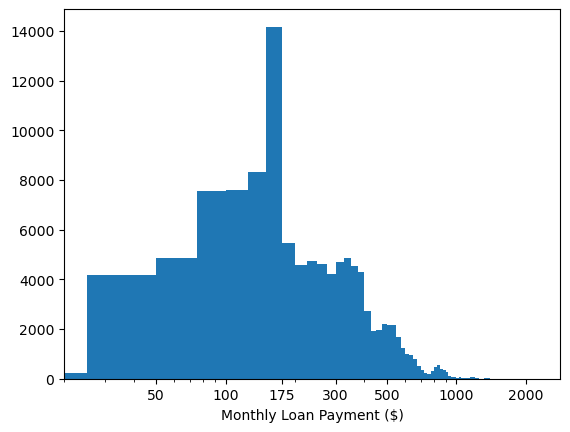

In [28]:
# There's a long tail in the distribution, so let's put it on a log scale instead
bins = np.arange(0, loan.MonthlyLoanPayment.max() + 1, 25)

hist, bins, _ = plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
 
# Use non-equal bin sizes, such that they look equal on log scale.
np.seterr(divide = 'ignore')
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(data = loan, x = 'MonthlyLoanPayment', bins=logbins)
plt.xscale('log')
plt.xticks([50, 100, 175, 300, 500, 1000, 2000], ['50', '100', '175','300', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)');

We can see that the Monthly Loan Payment has a long-tailed distribution, which most of the loan monthly payments are on low payment amount, and few of them, on the high price end.

That said, the data was plotted on a log-scale, and the loan monthly payment amount distribution looks unimodal with just one peak. The peak value is near 175 (\\$)  where most of the loans can be found. The plot is roughtly skewed to the right, what shows that most of the loans have less than 175 (\\$) as monthly loan payment and few of them have more than that price as monthly payment.

Finally, there are still three more features that we can analyse its count: TotalProsperLoans, OnTimeProsperPayments and ProsperPaymentsOneMonthPlusLate.

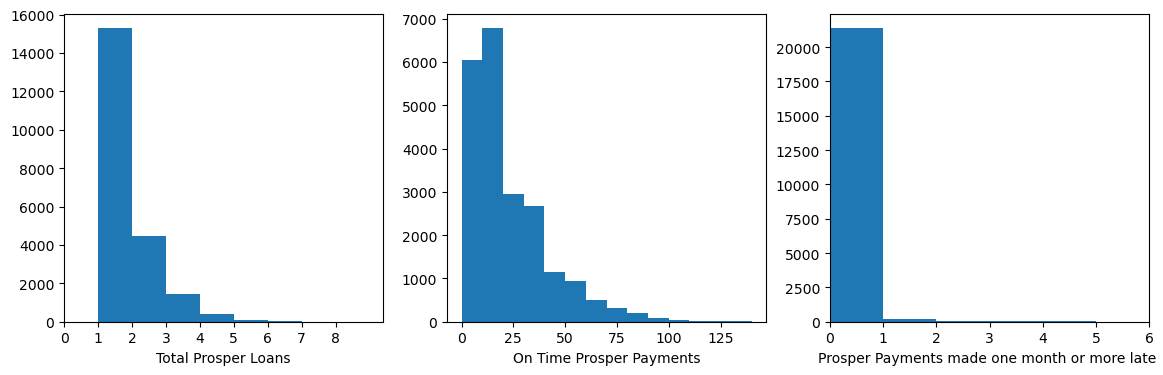

In [18]:
# plot all three together to get an idea of each discrete variable's distribution.
plt.figure(figsize = [14, 4])

plt.subplot(1, 3, 1)
bins = np.arange(1, 8+1.1, 1 )
plt.hist(data = loan, x = 'TotalProsperLoans', bins = bins)
plt.xlabel('Total Prosper Loans')
plt.xticks(loan.TotalProsperLoans.value_counts().index)

plt.subplot(1, 3, 2)
bins = np.arange(0, 141+1.1, 10 )
plt.hist(data = loan, x = 'OnTimeProsperPayments', bins = bins)
plt.xlabel('On Time Prosper Payments')

plt.subplot(1, 3, 3)
bins = np.arange(0, 21+1.1, 1 )
plt.hist(data = loan, x = 'ProsperPaymentsOneMonthPlusLate', bins = bins)
plt.xlabel('Prosper Payments made one month or more late ')
plt.xlim(0, 6)

plt.show()

**Note:** The data used to these results are from few more than 20,000 loans. I supose that the rest of the loans have this features as null, because those loans were created when the borrowers did not have any other loans related to Prosper Loans previously.

The three plots show information about the Total Prosper Loans made by each borrower that are more ofter one loan or two. These loans are mostly paid about 20 times or more, but few of them are paid more than 75 times. That being said, we can also see that most of the loans are just paid one month and few of the them more late than that.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The LoamA Original Amount variable took on a large range of values, leading to the investigation of the data using a log transform. Under the transformation, the data looked multimodal, with many peaks between 3500 and 6000, 6000 and 12000, 12000 and 17500, and so on; other peaks are below 4000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were an unusual distribution about Prosper payments made one month or more late, but there was no untidy data or quality issues related to the feature, no needing any operations to be done.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
dataset.

Let's start with the pairwise correlations present between features in the data

<AxesSubplot: >

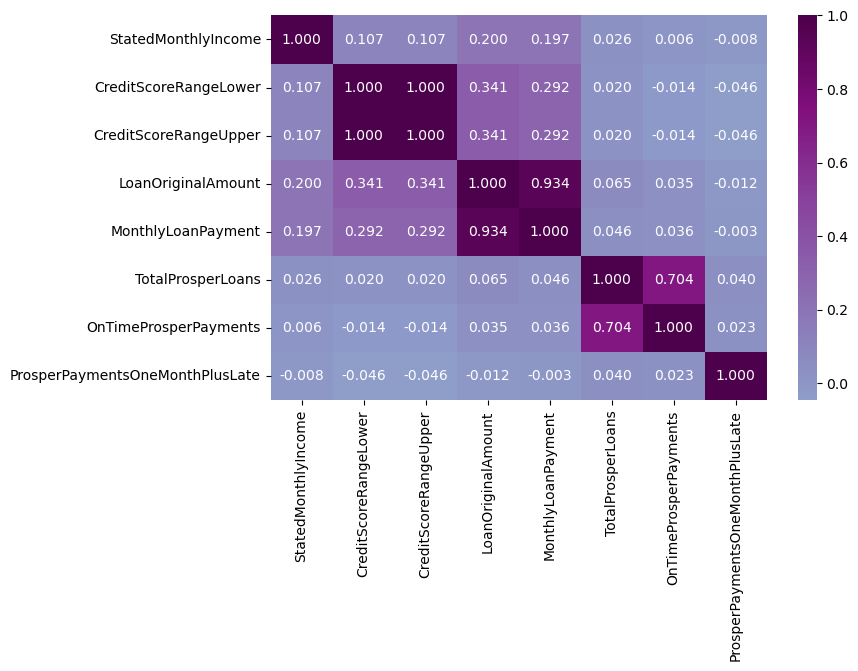

In [19]:
# correlation plot of all numeric variables
numeric_vars = ['StatedMonthlyIncome', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'LoanOriginalAmount', 
                'MonthlyLoanPayment', 'TotalProsperLoans', 'OnTimeProsperPayments', 'ProsperPaymentsOneMonthPlusLate'] 
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BuPu', center = 0)

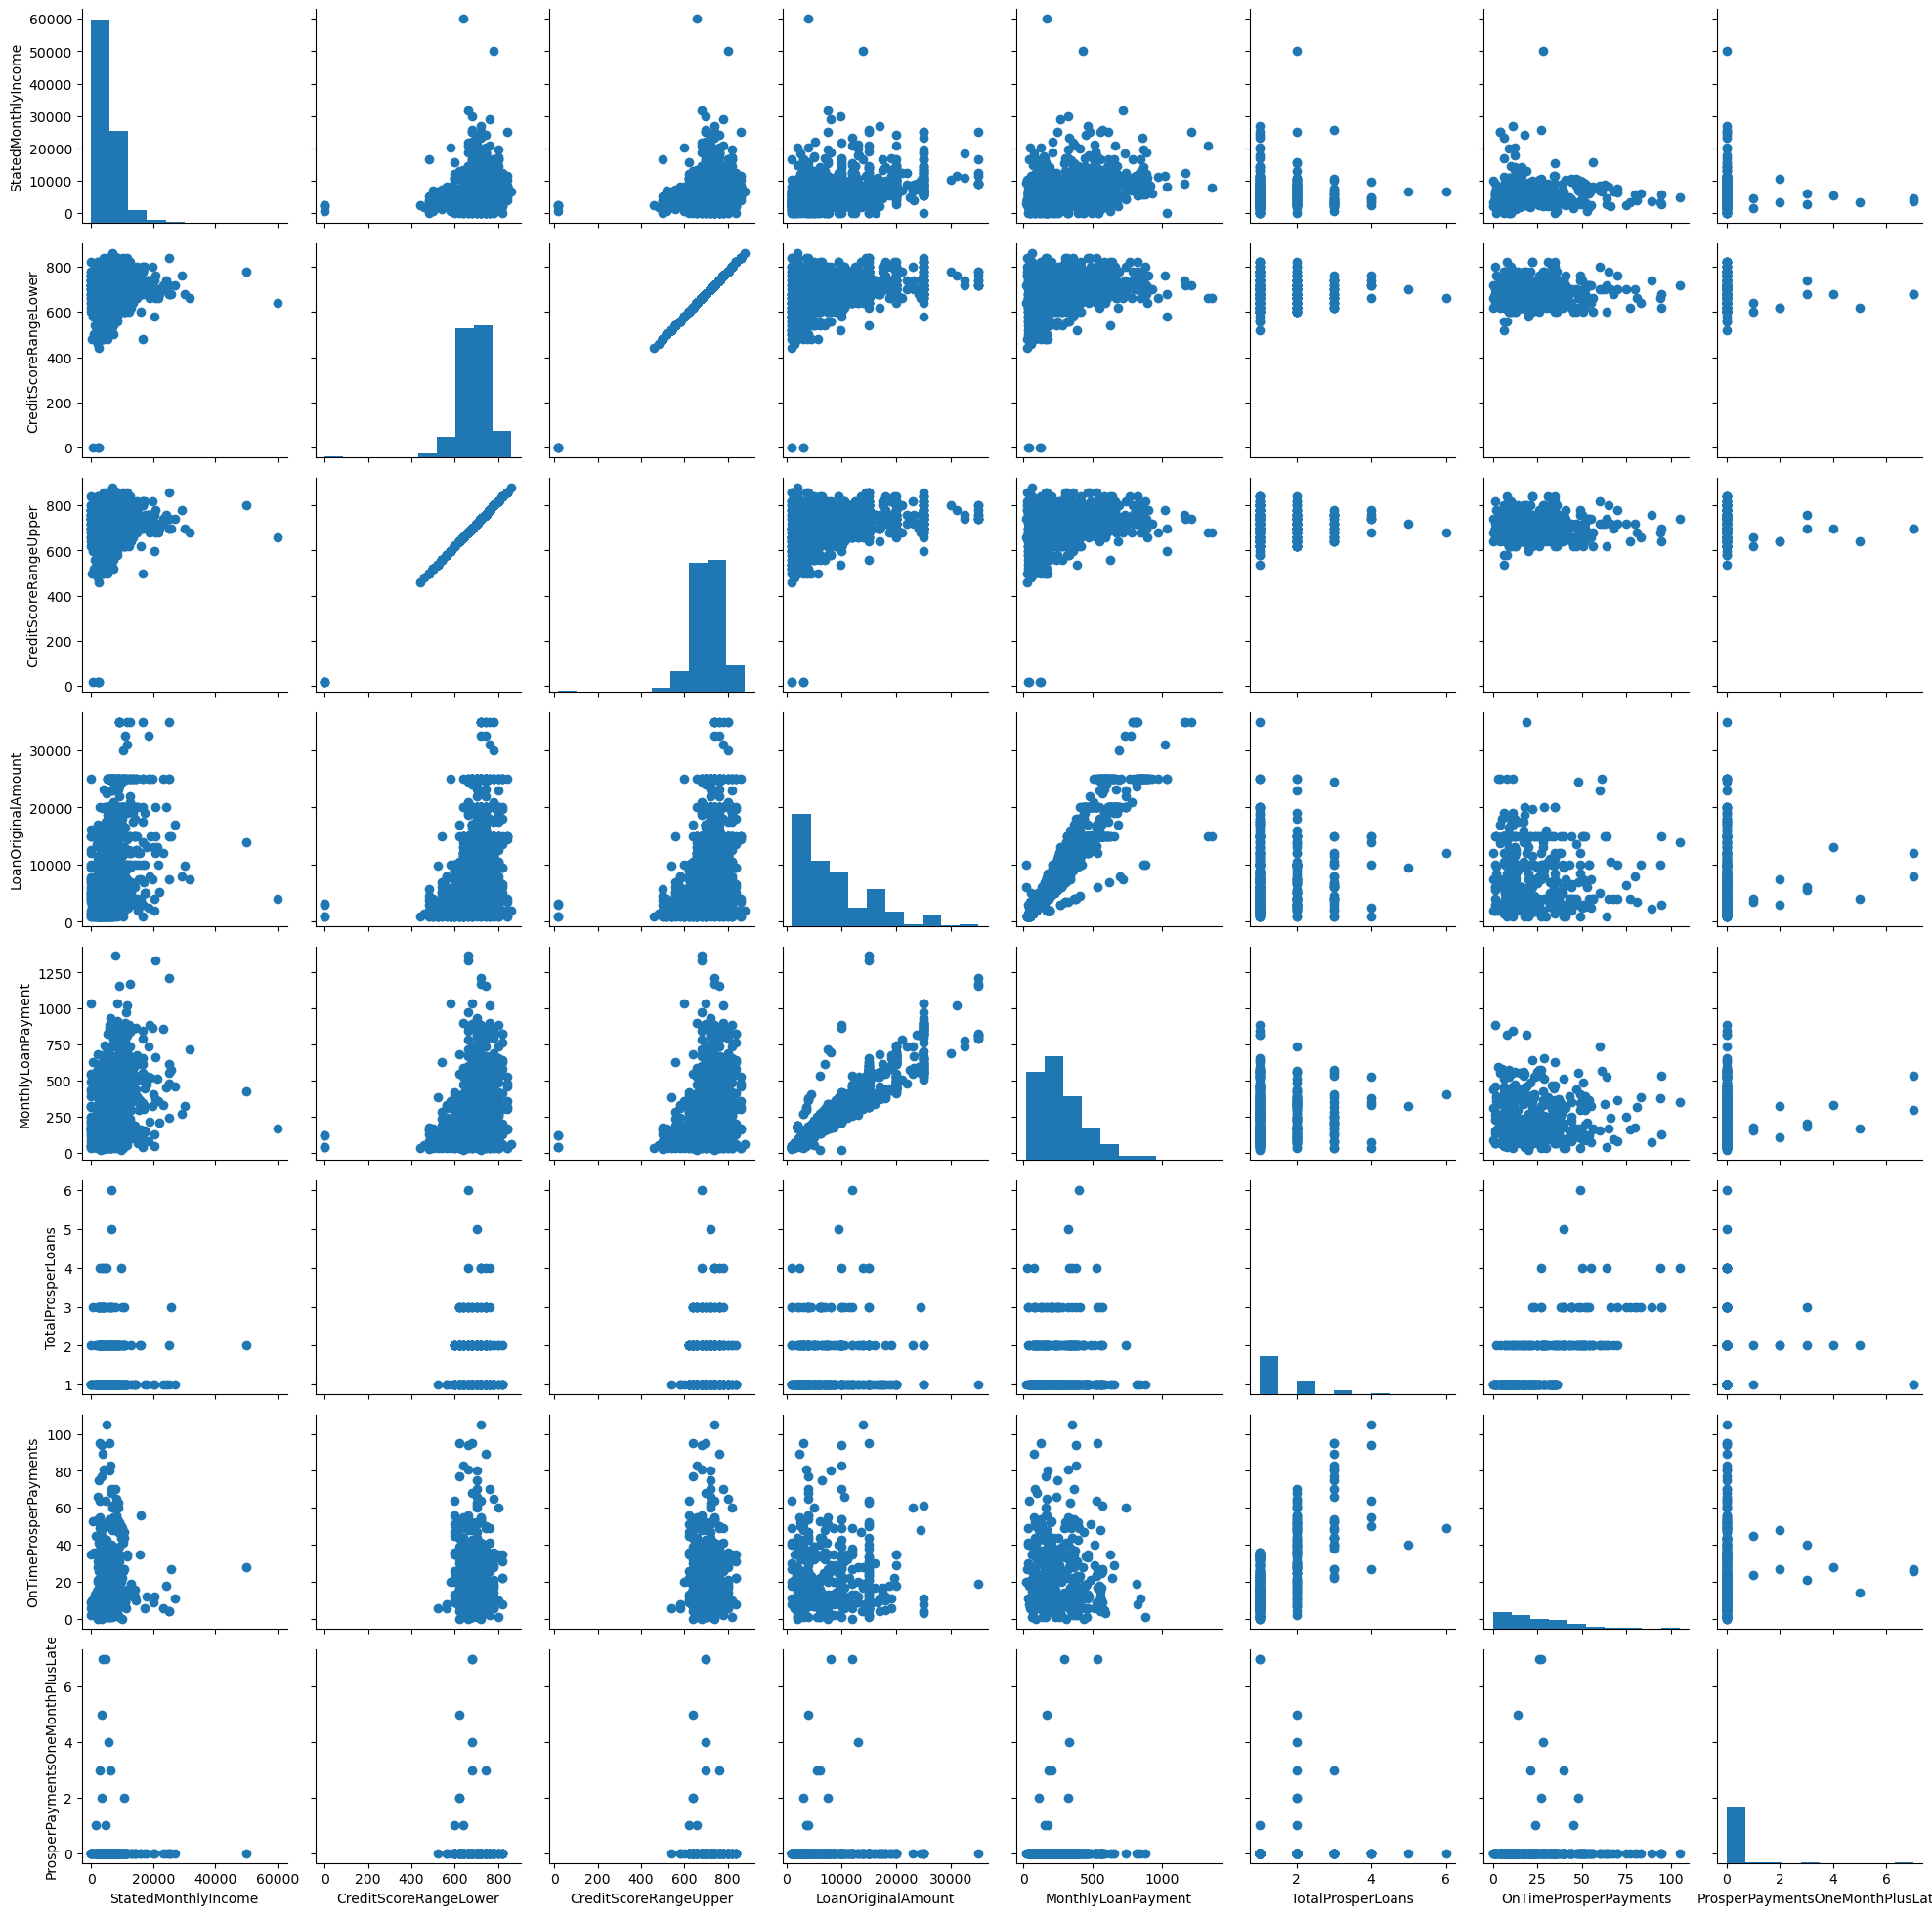

In [20]:
# plot matrix: using 2000 loans as sample so that plots are clearer and they render faster
loan_sample = loan.sample(n = 2000, replace = False)
grid = sb.PairGrid(data = loan_sample, vars = numeric_vars)
grid = grid.map_diag(plt.hist, bins = 10)
grid.map_offdiag(plt.scatter);

As we can see, few of the numeric features are correlated, and we see the moderate negative correlation hypothesized in the previous plot, except for Loan Original Amount that is highly related to Monthly Loan Payment positively, which could mean that the higher the Loan Original Amount, the higher the Monthly Loan Payment gets.

There is also a highly correlation between  Lower Credit Score Range and Upper Credit Score Range, which makes sense, once if the lower credit score range is a great amount, the upper credit score range must be higher than the lower credit amount.

I want take a close look in Loan Original Amount and Monthly Loan Payment relation.

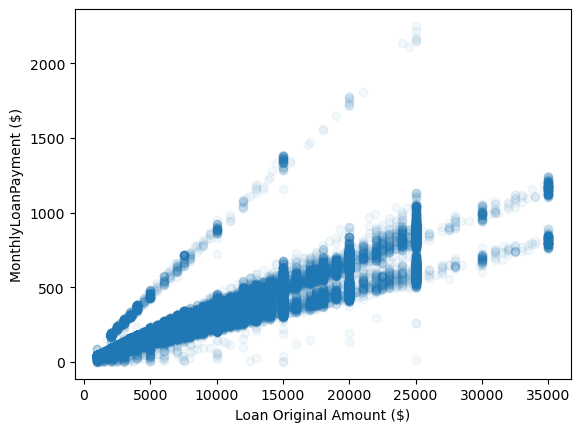

In [21]:
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', alpha = 1/20);
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('MonthlyLoanPayment ($)');

There is indeed a positive correlation between Loan Original Amount and Monthly Loan Payment, where most of the distribution is concentrated betweet 0 and 25,000 \($) loan original amount.

That being said, let's move to the investigation of the relation between LoanOriginalAmount, ListingCategory, StatedMonthlyIncome, EmploymentStatus and MonthlyLoanPayment.

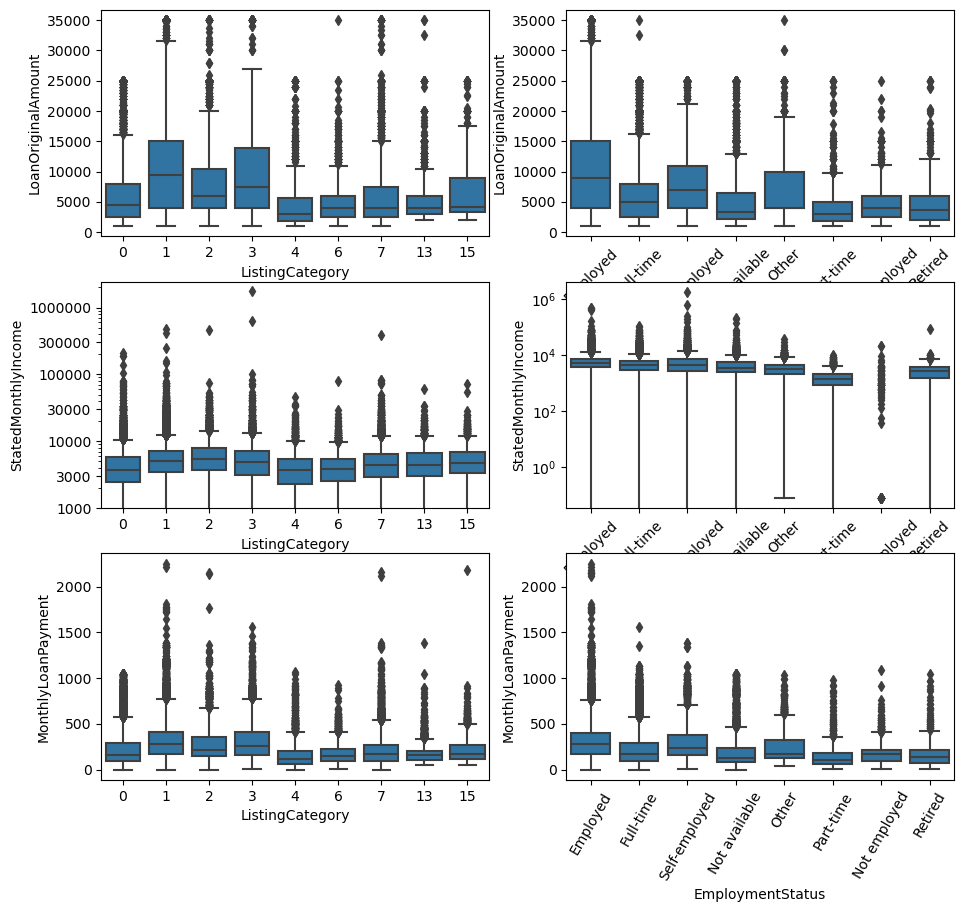

In [22]:
# plot the categorical variables against numeric variables 
plt.figure(figsize = [11, 10])

plt.subplot(3, 2, 1)
sb.boxplot(data=category, x='ListingCategory', y='LoanOriginalAmount', color=base_color)

plt.subplot(3, 2, 2)
sb.boxplot(data=category, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation = 45)

plt.subplot(3, 2, 3)
sb.boxplot(data=category, x='ListingCategory', y='StatedMonthlyIncome', color=base_color)
plt.yscale('log')
label = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
ylabel = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
plt.yticks(ylabel, label)

plt.subplot(3, 2, 4)
sb.boxplot(data=category, x='EmploymentStatus', y='StatedMonthlyIncome', color=base_color)
plt.yscale('log')
plt.xticks(rotation = 45)

plt.subplot(3, 2, 5)
sb.boxplot(data=category, x='ListingCategory', y='MonthlyLoanPayment', color=base_color)

plt.subplot(3, 2, 6)
sb.boxplot(data=loan, x='EmploymentStatus', y='MonthlyLoanPayment', color=base_color)
plt.xticks(rotation = 60);

With the information above, seems like the borrowers with the highest loan original amount are the Employed, where they can borrow 5000 (\\$) or more.

It can happen to have borrowers with Stated Monthly Income of 0 (\\$), even if they are employed. The borrowers from Home Improvement loan category tend to have the highest distribution in terms of Monthly Income.

Interestingly, the Not Employed borrowers do not have a stated monthly income amount (except for the outliers, that show a high value amount), but their monthly loan payment amount distribution is not the lowest, meaning that they can tend to make loans that require more than 100 (\\$) payment per month.

Let's look if there is a relation between the Loan Employment Status and Listing Category.

(0.0, 9000.0)

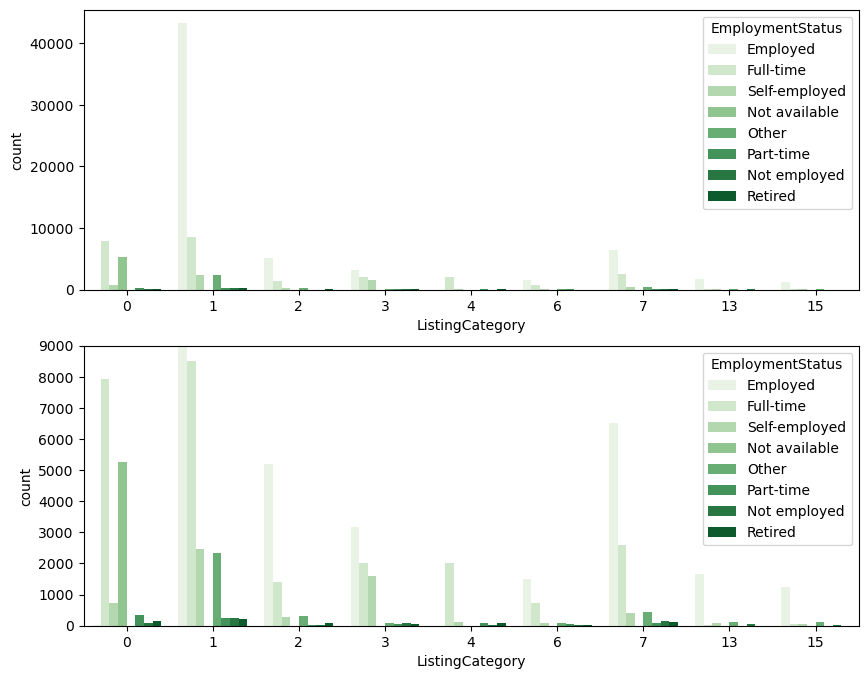

In [23]:
# Employment Status vs. Listing Category
# Using the dataset with the Listing categories that belong to most of the loans

plt.figure(figsize = [10, 8])

# Subplot without y axis limit
plt.subplot(2, 1, 1)
sb.countplot(data = category, x = 'ListingCategory', hue = 'EmploymentStatus', palette = 'Greens')

# Subplot with y axis limit defined
plt.subplot(2, 1, 2)
sb.countplot(data = category, x = 'ListingCategory', hue = 'EmploymentStatus', palette = 'Greens')
plt.ylim(0, 9000)


It seems that the Employed Borrower is the most predominant in most of the loan categories, followed by the Full-Time Employed, but many of them make loans for Debt Consolidation. Other, Not Employed, Part-time and Retired borrowers do not seem to be the type of borrower who take many loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Many numeric features are not related with each other, except for Loan Original Amount that is highly related to Monthly Loan Payment positively, turning out to not having much to conclude in this part.
>
> Next, there was an investigation of the relation between the numeric features LoanOriginalAmount and MonthlyLoanPayment, and the categorical features ListingCategory, StatedMonthlyIncome and EmploymentStatus. This led us to conclusions related to the employment status of the borrower, giving the ideia that the feature can impact the loan characteristics.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between the Employment status and the Listing Category gave the ideia of who is the predominant type of borrower among the various categories of loans.

## Multivariate Exploration

> Creating plots of three or more variables to investigate the data even further.

In this section, I am looking forward to see what kind of relation could be based in the main feature of the investigation, the original loan amount and the monthly loan payment, based in the borrower employment status.  Let's look to each employment status category.

In [24]:
def hist2d (x, y, **kwargs):
    palette = kwargs.pop('color')
    plt.hist2d(x = x, y = y, cmap = palette, cmin = 1)
    plt.colorbar()

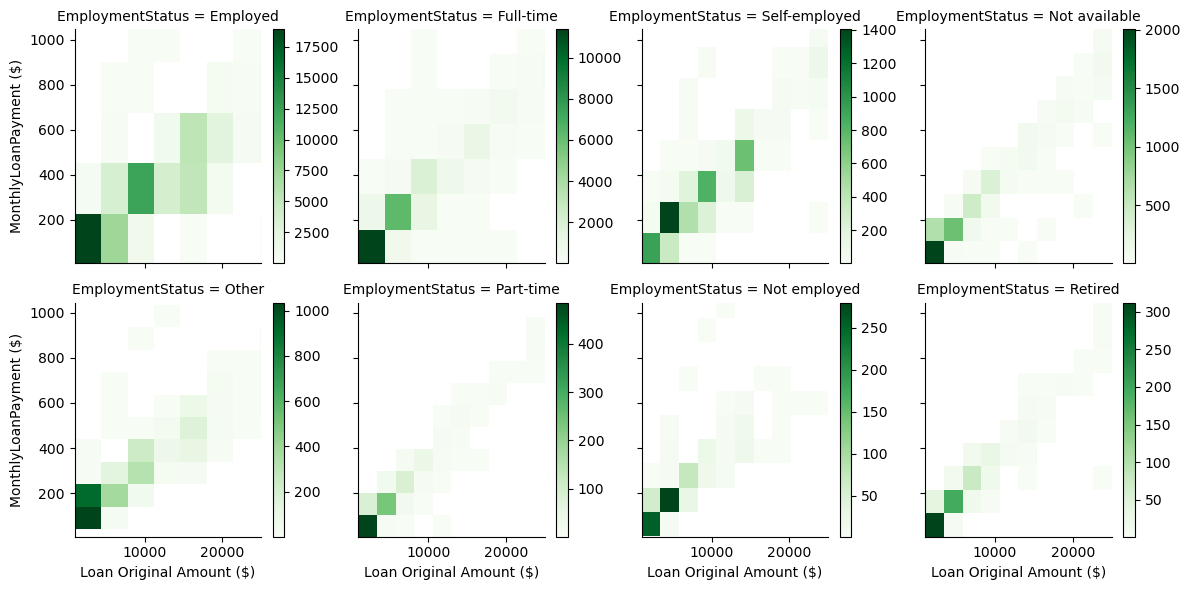

In [25]:
# create faceted heat maps on employment staus categories
g = sb.FacetGrid(data = loan, col = 'EmploymentStatus',   col_wrap = 4, margin_titles = True)
g.map(hist2d, 'LoanOriginalAmount', 'MonthlyLoanPayment', color = 'Greens')
g.set_xlabels('Loan Original Amount ($)')
g.set_ylabels('MonthlyLoanPayment ($)');

This shows that the Part-time, Not Employed and Retired Borrowers are not likely to make loans that require a high monthly payment, besides the borrrowers with other employment status that can surpass 200 \($) of monthly payment.

Let's look closely to how the borrowers behave in terms of paying the loan monthly.

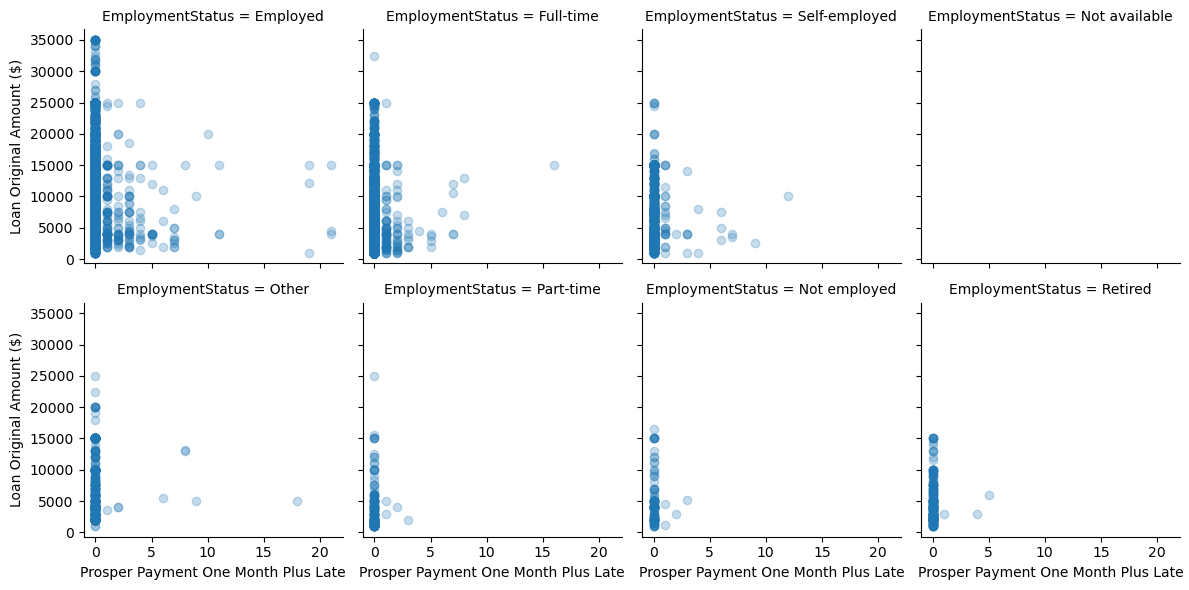

In [26]:
# create faceted scatterplots on employment staus categories
g = sb.FacetGrid(data = loan, col = 'EmploymentStatus',   col_wrap = 4, margin_titles = True)
g.map(plt.scatter, 'ProsperPaymentsOneMonthPlusLate', 'LoanOriginalAmount', alpha = 1/4)
g.set_xlabels('Prosper Payment One Month Plus Late')
g.set_ylabels('Loan Original Amount ($)');

Besides the Employed borrower being in majority, it is shown that no matter the loan original amount or the employment status of the borrower, the borrower still can make payments one month later or more. We can see that most of the borrowers do not fail in paying the loan on time too.

Interestingly, borrowers with a high loan original amount do not tend to make the payment later.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, the investigation went through the relation between the loan original amount and the loan monthly payment by looking for each employment status for the borrower to see the impact that it coul have in the relation. There are some conclusions that could have been drawn, but not with precision, due to the fact that the employment status in majority and the others have a huge difference in quantity, making the results predictable and more susceptible to variations.
>
> By looking to the relation mentioned above, the question that could respond if the borrowers can pay on time the monthly loan payment regardless amount came, where we could draw a conclusion invoving our feature of interest (Loan Original Amount).

## Conclusions
> Investigating distributions of individual variables in the dataset, we can conclude that regardless the loan amount,  most of the loans were currently being paid in that season, but many of them were completed too. Interestingly, a good amount of loans have payment that has not been made by its cutoff time (Past Due).
>
> Most of the borrowers are employed (more than 60,000), followed by full-time and self-employed borrowers. Most of the loans belong to the listing category 1 (Loan for Debt Consolidation) followed by the listing category 0 (Not Available) and 7 (Loan for Other reason) and other categories, what could mean that a great amount of loans for Debt Consolidation can belong to employed borrowers.
>
> The Loan Original Amount is highly related to Monthly Loan Payment positively (where most of the distribution is concentrated betweet 0 and 25,000 (\\$) loan original amount), which could mean that the higher the Loan Original Amount, the higher the Monthly Loan Payment gets. There is also a positive relationship between Lower Credit Score Range and Upper Credit Score Range, which makes sense, once if the lower credit score range is a great amount, the upper credit score range must be higher than the lower credit amount.
> 
> Borrowers with the highest loan original amount are the Employed ones, where they can borrow 5000 (\\$) or more. It can happen to have borrowers with Stated Monthly Income of 0 (\\$), even if they are employed. The borrowers from Home Improvement loan category tend to have the highest distribution in terms of Monthly Income. The Not Employed borrowers do not have a stated monthly income amount (except for very few of them) but their monthly loan payment amount is not the lowest, meaning that they can tend to make loans that require more than 100 (\\$) payment per month. The Part-time, Not Employed and Retired Borrowers are not likely to make loans that require a high monthly payment, besides the borrrowers with other employment status that can surpass 200 ($) of monthly payment.
>
> Besides the Employed borrower being in majority, it is shown that no matter the loan original amount or the employment status of the borrower, the borrower still can make payments one month later or more. We can see that most of the borrowers to do not fail in paying the loan on time too. In additional, borrowers with a high loan original amount do not tend to make the payment later.